# Player Classification with CNN

In [147]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [148]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [149]:
classifier = Sequential()

In [150]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())

In [151]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))


In [152]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

In [153]:
# Flattening
classifier.add(Flatten())

In [154]:
# Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(1, activation = 'sigmoid'))

In [155]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 51, 51, 32)        2432      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 25, 25, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 2, 2, 64)         

In [156]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [157]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [158]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [159]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN/dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 209 images belonging to 2 classes.


In [160]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN/dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 72 images belonging to 2 classes.


In [161]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
from livelossplot import PlotLossesKerasTF

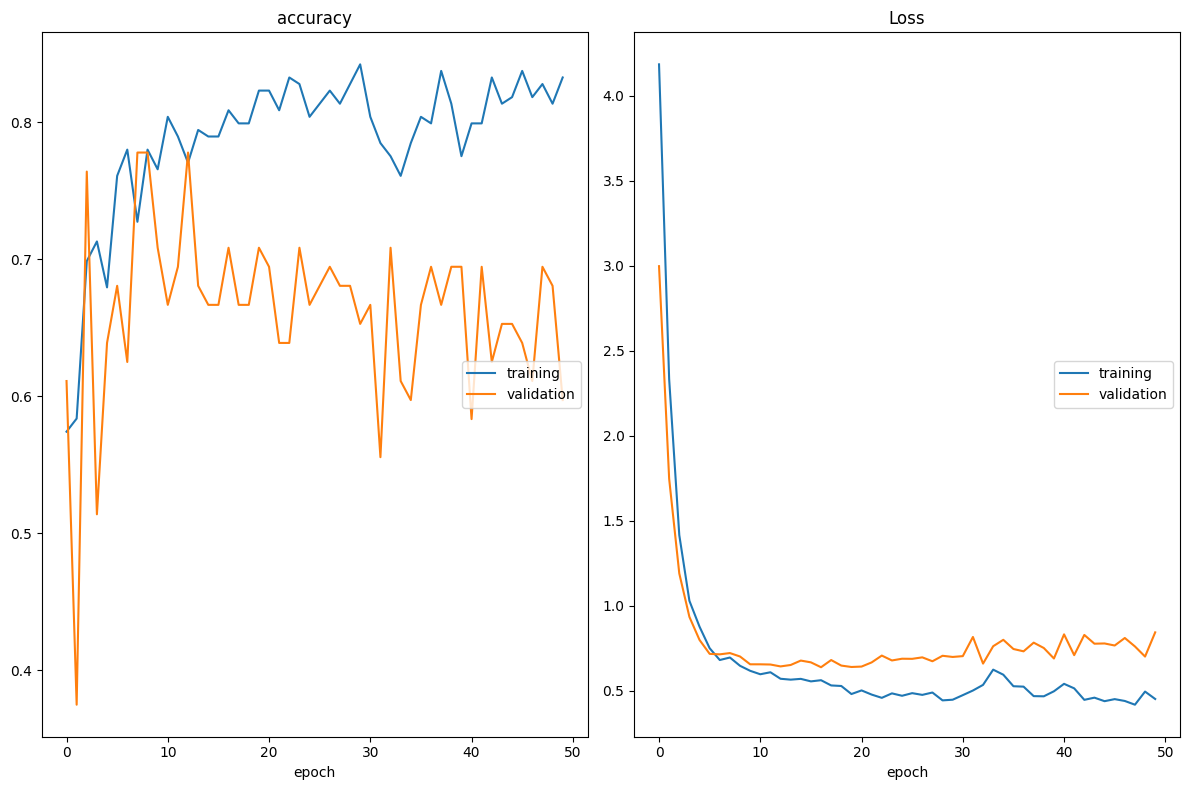

accuracy
	training         	 (min:    0.574, max:    0.842, cur:    0.833)
	validation       	 (min:    0.375, max:    0.778, cur:    0.597)
Loss
	training         	 (min:    0.418, max:    4.185, cur:    0.452)
	validation       	 (min:    0.639, max:    2.998, cur:    0.844)
14/14 [==============================] - 4s 283ms/step - loss: 0.4519 - accuracy: 0.8325 - val_loss: 0.8438 - val_accuracy: 0.5972


In [163]:
classifier.fit(training_set,epochs=50,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


In [164]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/CNN/dataset/train/dhoni/d1.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 69ms/step
Result is 0.0
dhoni


In [165]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/CNN/dataset/train/kohli/v1.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 22ms/step
Result is 1.0
kohli
